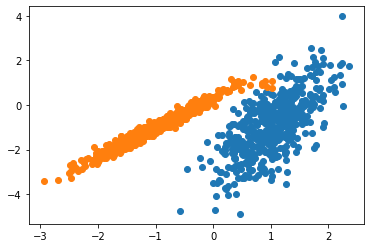

In [20]:
# 15 dwdm birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)

yhat = model.predict(X)

clusters = unique(yhat)

for cluster in clusters:

	row_ix = where(yhat == cluster)

	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

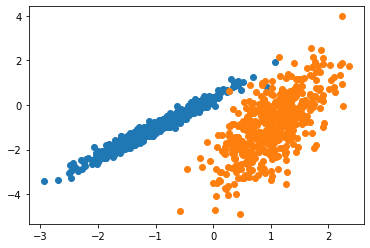

In [4]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [5]:
def Load_data():
    baskets_data = [
        ['kruh', 'mleko'],
        ['kruh', 'plenice', 'union'],
        ['mleko', 'plenice', 'union'],
        ['kruh', 'mleko', 'plenice', 'union'],
        ['kruh', 'mleko', 'plenice'],
        ['mleko', 'plenice'],
        ['plenice'],
        ['mleko', 'union', 'plenice'],
        ['plenice', 'union'],
        ['mleko', 'plenice', 'union'],
    ]
    return baskets_data
def createC1(data):
    """
    Create a list of unique items in transaction data.
    Represent each item as a set of length 1.
    """
    C1 = []
    for transaction in data:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    
    # create a set for each item in C1
    return [set(x) for x in C1]
def createCk(Lk, k):
    """
    Create a list of candidates of length k.
    
    Arguments:
       Lk: a list of frequent itemsets
       k: the size of the itemsets
    
    """
    cand_list = []
    len_Lk = len(Lk)
    
    # join sets if first k-2 items are equal
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])
    
    return cand_list
def scanD(data, Ck, min_support):
    """
    Scan through transaction data and return a list of candidates that meet
    the support threshold, and support data about the current candidates.
    
    Arguments:
       data: data set,
       Ck: a list of candidate sets
       min_support: the minimum support
    """
    count = {}
    for transaction in data:
        tr = set(transaction)
        for candidate in Ck:
            if candidate.issubset(tr):
                can = frozenset(candidate)
                if can not in count:
                    count[can] = 1
                else:
                    count[can] += 1
                    num_items = float(len(D))
    
    cand_list = []
    support_data = {}
    
    # calculate support for every itemset
    for key in count:
        support = count[key]/num_items
        
        # If the support meets the minimum support requirements, 
        # add it to the list of itemsets.
        if support >= min_support:
            cand_list.insert(0, key)
        support_data[key] = support
    
    return cand_list, support_data
min_support = 0.5
data = Load_data()
data


[['kruh', 'mleko'],
 ['kruh', 'plenice', 'union'],
 ['mleko', 'plenice', 'union'],
 ['kruh', 'mleko', 'plenice', 'union'],
 ['kruh', 'mleko', 'plenice'],
 ['mleko', 'plenice'],
 ['plenice'],
 ['mleko', 'union', 'plenice'],
 ['plenice', 'union'],
 ['mleko', 'plenice', 'union']]

In [6]:
C1 = createC1(data)
C1

[{'kruh'}, {'mleko'}, {'plenice'}, {'union'}]

In [7]:
D = list(map(set, data))
D

[{'kruh', 'mleko'},
 {'kruh', 'plenice', 'union'},
 {'mleko', 'plenice', 'union'},
 {'kruh', 'mleko', 'plenice', 'union'},
 {'kruh', 'mleko', 'plenice'},
 {'mleko', 'plenice'},
 {'plenice'},
 {'mleko', 'plenice', 'union'},
 {'plenice', 'union'},
 {'mleko', 'plenice', 'union'}]

In [8]:
L1, support_data1 = scanD(D, C1, min_support)

In [9]:
L1

[frozenset({'union'}), frozenset({'plenice'}), frozenset({'mleko'})]

In [10]:
support_data1

{frozenset({'kruh'}): 0.4,
 frozenset({'mleko'}): 0.7,
 frozenset({'plenice'}): 0.9,
 frozenset({'union'}): 0.6}

In [11]:
C2 = createCk(L1, k=2)
C2

[frozenset({'plenice', 'union'}),
 frozenset({'mleko', 'union'}),
 frozenset({'mleko', 'plenice'})]

In [12]:
L2, support_data2 = scanD(D, C2, min_support)

In [13]:
L2

[frozenset({'mleko', 'plenice'}), frozenset({'plenice', 'union'})]

In [14]:
support_data2

{frozenset({'plenice', 'union'}): 0.6,
 frozenset({'mleko', 'union'}): 0.4,
 frozenset({'mleko', 'plenice'}): 0.6}

In [15]:
C3 = createCk(L2, k=3)
C3

[frozenset({'mleko', 'plenice', 'union'})]

In [16]:
L3, support_data3 = scanD(D, C3, min_support)
L3

[]

In [17]:
support_data3

{frozenset({'mleko', 'plenice', 'union'}): 0.4}

In [18]:
# Apriori end